In [163]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [164]:
#pip install xgboost

In [165]:
file_path_train = os.path.abspath("C:/Users/wania_96/Desktop/Train.csv")
df_train = pd.read_csv(file_path_train)

In [166]:
file_path_test = os.path.abspath("C:/Users/wania_96/Desktop/Test.csv")
df_test = pd.read_csv(file_path_test)

In [167]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [168]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [169]:
df_train.shape

(8523, 12)

In [170]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [171]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [172]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [173]:
df_train['Item_Weight'].mean()

12.857645184136183

In [174]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

In [175]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [176]:
df_test['Item_Weight'].mean()

12.695633368756374

In [177]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [178]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [179]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

In [180]:
df_test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [181]:
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [182]:
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [183]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [184]:
df_test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

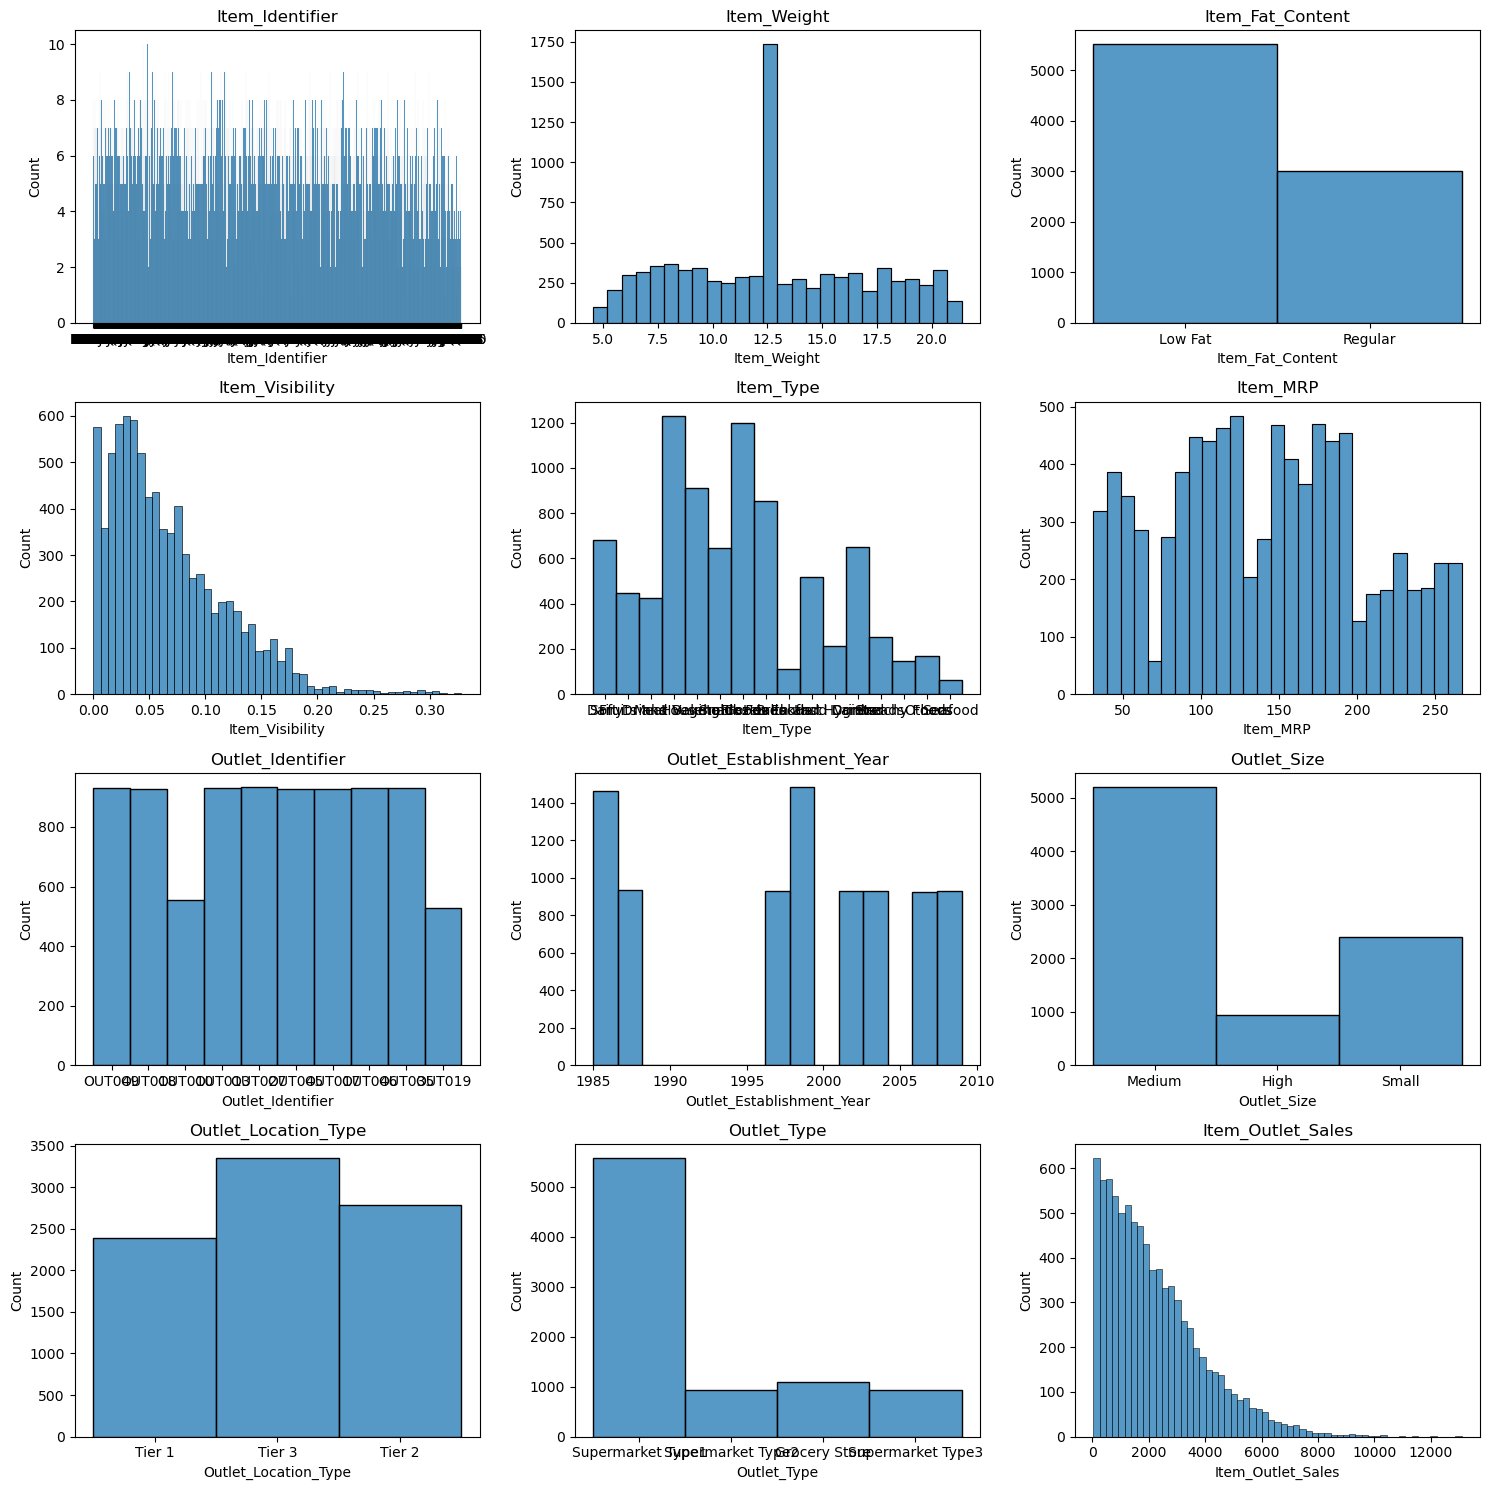

In [185]:
num_rows = 4
num_cols = 3

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to make it easier to work with
axes = axes.flatten()

# Iterate over each column and create the distribution plot
for i, column in enumerate(df_train.columns):
    # Select the current axis
    ax = axes[i]
    
    # Create the distribution plot for the current column
    sns.histplot(df_train[column], ax=ax)
    
    # Set the title of the subplot
    ax.set_title(column)
# Adjust the layout and spacing of subplots
fig.tight_layout()

# Display the figure with subplots
plt.show()

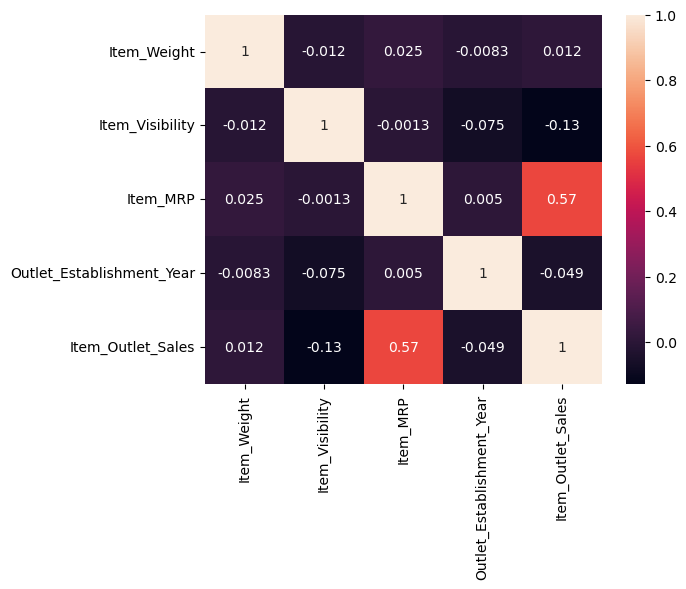

In [186]:
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [187]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [188]:
lc = LabelEncoder()

In [189]:
df_train['Item_Identifier'] = lc.fit_transform(df_train['Item_Identifier'])

df_train['Item_Fat_Content'] =lc.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = lc.fit_transform(df_train['Item_Type'])

df_train['Outlet_Identifier'] = lc.fit_transform(df_train['Outlet_Identifier'])

df_train['Outlet_Size'] = lc.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = lc.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = lc.fit_transform(df_train['Outlet_Type'])

In [190]:
df_test['Item_Identifier'] = lc.fit_transform(df_test['Item_Identifier'])

df_test['Item_Fat_Content'] =lc.fit_transform(df_test['Item_Fat_Content'])

df_test['Item_Type'] = lc.fit_transform(df_test['Item_Type'])

df_test['Outlet_Identifier'] = lc.fit_transform(df_test['Outlet_Identifier'])

df_test['Outlet_Size'] = lc.fit_transform(df_test['Outlet_Size'])

df_test['Outlet_Location_Type'] = lc.fit_transform(df_test['Outlet_Location_Type'])

df_test['Outlet_Type'] = lc.fit_transform(df_test['Outlet_Type'])

In [191]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<AxesSubplot:xlabel='Item_Weight'>

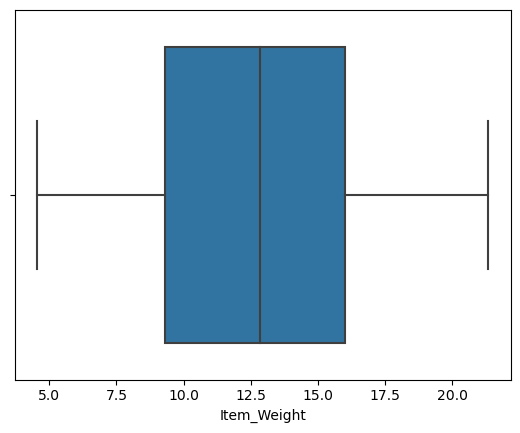

In [192]:
sns.boxplot(df_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

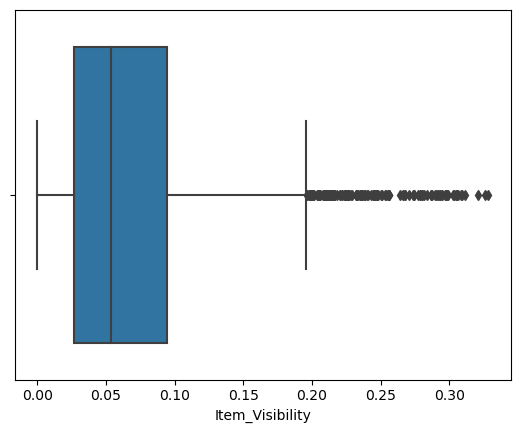

In [193]:
sns.boxplot(df_train['Item_Visibility'])

In [194]:
df_train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot:xlabel='Item_Visibility'>

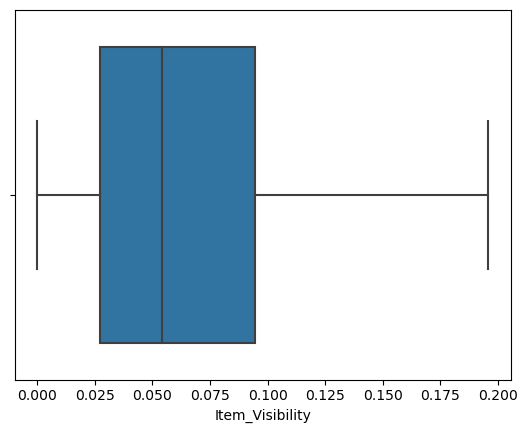

In [195]:
q3=0.0945
q1=0.0269
iqr=q3-q1
uc=q3+(1.5*iqr)
df_train['Item_Visibility']=np.where(df_train['Item_Visibility']>uc,uc,df_train['Item_Visibility'])

sns.boxplot(df_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

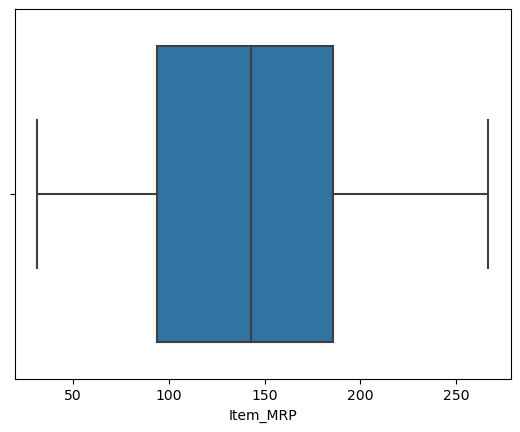

In [196]:
sns.boxplot(df_train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

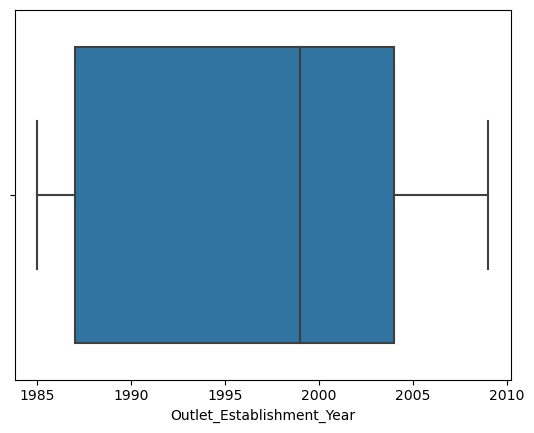

In [197]:
sns.boxplot(df_train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

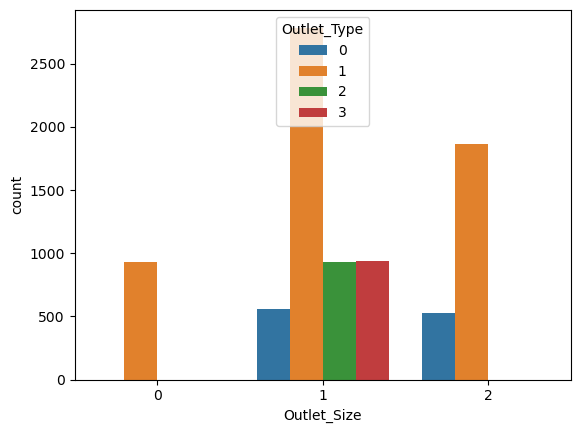

In [198]:
sns.countplot(x='Outlet_Size', hue='Outlet_Type', data=df_train)

In [199]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
X=df_train.drop(['Item_Outlet_Sales'],axis=1)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [202]:
print(vif)

    VIF Factor                   features
0     4.081469            Item_Identifier
1    10.292430                Item_Weight
2     1.601457           Item_Fat_Content
3     2.906709            Item_Visibility
4     4.041163                  Item_Type
5     6.139213                   Item_MRP
6    15.497847          Outlet_Identifier
7    56.998947  Outlet_Establishment_Year
8     7.944858                Outlet_Size
9    16.598237       Outlet_Location_Type
10    8.425237                Outlet_Type


In [203]:
X2=X.drop(['Outlet_Establishment_Year'],axis=1)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns

In [204]:
print(vif)

   VIF Factor              features
0    3.849998       Item_Identifier
1    8.717241           Item_Weight
2    1.562960      Item_Fat_Content
3    2.774422       Item_Visibility
4    3.817265             Item_Type
5    5.689512              Item_MRP
6   10.362396     Outlet_Identifier
7    6.567841           Outlet_Size
8    9.339268  Outlet_Location_Type
9    7.538313           Outlet_Type


In [205]:
X3=X2.drop(['Outlet_Identifier'],axis=1)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns

In [206]:
print(vif)

   VIF Factor              features
0    3.752994       Item_Identifier
1    7.996082           Item_Weight
2    1.544905      Item_Fat_Content
3    2.756737       Item_Visibility
4    3.702135             Item_Type
5    5.442279              Item_MRP
6    5.611629           Outlet_Size
7    4.850505  Outlet_Location_Type
8    4.315345           Outlet_Type


In [207]:
X = X3
y = df_train['Item_Outlet_Sales']

X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,1,0,1
1,8,5.92,1,0.019278,14,48.2692,1,2,2
2,662,17.50,0,0.016760,10,141.6180,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,1,2,0
4,1297,8.93,0,0.000000,9,53.8614,0,2,1


In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [209]:

lr=LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Report\n")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Linear Regression Report

Mean squared error: 1294198.41
R-squared: 0.52


In [210]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Report\n")
print("Feature importances:")
print(rf_model.feature_importances_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Random Forest Regression Report

Feature importances:
[0.06706838 0.04525116 0.00756317 0.09812051 0.03312266 0.44321051
 0.01665558 0.01620178 0.27280624]

Model performance:
Mean squared error: 1232296.02
R-squared: 0.55


In [211]:

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

XGBoost Regression Report

Mean squared error: 1243119.61
R-squared: 0.54


In [212]:
import pickle
with open(r'C:\Users\wania_96\Desktop\mini_project\xgb_models.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)